<a href="https://colab.research.google.com/github/kk-dev13/deep_learning_tutorials/blob/main/digits_recognition_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align="center">Handwritten digits classification using neural network</h2>

* classify handwritten digits using a simple neural network which has **only input and output layers.** 


# Import the Modules

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# Load dataset from keras
* Returns tuple of NumPy Arrays
* Training dataset = 60000 images each of 28x28 pixels.
* Testing dataset = 10000 images each of 28x28 pixels
* Output dataset = 1 column consisting the corresponding digit value of the input image

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [23]:
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [24]:
print(y_train.shape, y_test.shape)

(60000,) (10000,)


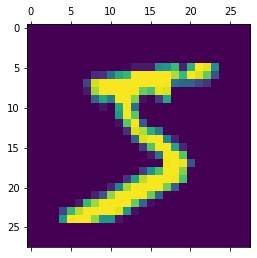

In [25]:
# Display One input image
plt.matshow(X_train[0])

In [26]:
# Corresponding the value of the above image
y_train[0]

5

# Normalize the values between 0 and 1

In [3]:
X_train = X_train / 255
X_test = X_test / 255

# Flatten the dataset
* Each image consists of total pixels =  28*28 = 784 pixels
* The 784 values are given to the input layers
* We can also flatten the data using the flatten layer while building the model

In [4]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [29]:
X_train_flattened.shape

(60000, 784)

# Simple neural network with no hidden layers</h3>

<img src="https://github.com/kk-dev13/deeplearning_tutorials/blob/master/1_digits_recognition/digits_nn.jpg?raw=1" />

# Build the Model
* Sequential = layers of neural network
* Dense = All neurons of 1st layer is connected to every other neuron in 2nd layer
* Here we are building only one layer which has input of 784 values (each image) and output which has 10 values corresponding to the probability

In [5]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

# Compile and provide the training data to the Model
* epochs = 

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4693 - accuracy: 0.8777
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3037 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2835 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2735 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2665 - accuracy: 0.9260


# Provide the test data to the model and check the accuracy

In [7]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2709 - accuracy: 0.9241


[0.2709316313266754, 0.9240999817848206]

# Test the output now
* For a given image from test dataset, can the model predict its value
* The output gives 10 values of probabilites for each digit the image belongs to


In [8]:
y_predicted = model.predict(X_test_flattened)

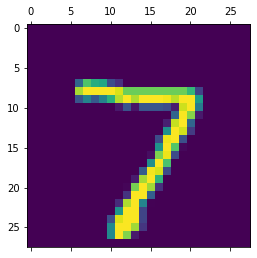

In [35]:
plt.matshow(X_test[0])

In [36]:
y_predicted[0]

array([1.79411471e-02, 2.90300278e-07, 3.85465622e-02, 9.34953868e-01,
       1.57314539e-03, 1.07908934e-01, 1.21446931e-06, 9.99732375e-01,
       9.29371119e-02, 6.60712838e-01], dtype=float32)

In [37]:
# np.argmax finds a maximum element  from an array and returns the index of it
np.argmax(y_predicted[0])

7

# Predicted Digit for each image

In [9]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

# Confusion Matrix
* How many times the model predicted correctly for each image and what was its output

In [10]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

Text(69.0, 0.5, 'Truth')

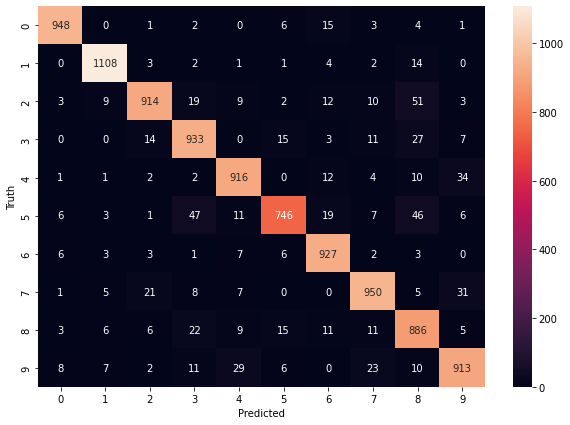

In [11]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Build the Model using one hidden layer
* Considering 100 neurons for the hidden layer

In [12]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),  # Hidden Layer
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2704 - accuracy: 0.9220
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1208 - accuracy: 0.9649
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0839 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0646 - accuracy: 0.9804
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0503 - accuracy: 0.9850


# Using the Flatten Layer

In [ ]:
# Using the Flatten Layer
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Flatten Layer
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

In [13]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0805 - accuracy: 0.9755


[0.08054836094379425, 0.9754999876022339]

Text(69.0, 0.5, 'Truth')

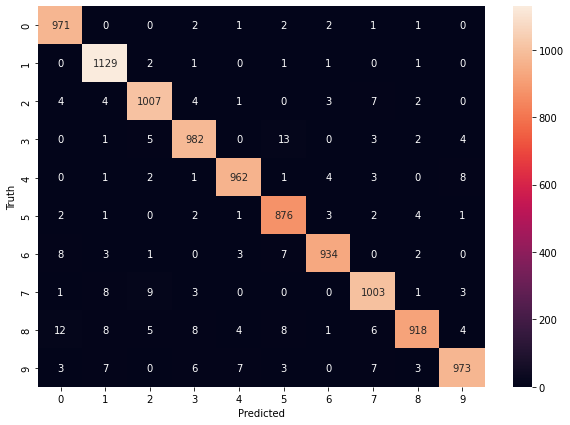

In [14]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')